In [94]:
# importing useful libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import pickle
import sys
from sys import exc_info
import ast

### Data Featuring

In [95]:
# loading the data

users_fav_movies = pd.read_csv("./Datasets/filtered_ratings.csv")

In [96]:
# displaying the data

users_fav_movies.T

,0,1,2,3,4,5,6,7,8,9,...,13893,13894,13895,13896,13897,13898,13899,13900,13901,13902
userId,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1170.0,1170.0,1170.0,1170.0,1170.0,1170.0,1170.0,1171.0,1171.0,1171.0
movieId,147.0,858.0,64.0,79.0,260.0,339.0,377.0,605.0,628.0,648.0,...,597.0,608.0,648.0,785.0,805.0,858.0,919.0,368.0,497.0,594.0
rating,4.5,5.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,...,4.0,4.5,4.0,4.0,4.0,5.0,4.0,4.0,4.0,5.0


In [97]:
user_id = users_fav_movies["userId"]
user_id = list(user_id)
user_id

[1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 17,
 17,
 17,
 18,
 18,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 21,
 22,
 22,
 22,
 22,
 23,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,


In [98]:
# function to return the list of movies watched by users

# users = a list of users IDs
# users_data =>user_fav_movies (a dataframe of users favourite movies or users watched movies)

def moviesListForUsers(users, users_data):
    users_movies_list = []
    for user in users:
        users_movies_list.append(str(list(users_data[users_data['userId'] == user]['movieId'])).split('[')[1].split(']')[0])
    return users_movies_list

In [99]:
# getting the users list

users = np.unique(users_fav_movies['userId'])
print(users.shape)

(1000,)


In [100]:
# list of movies for each user

users_movies_list = moviesListForUsers(users, users_fav_movies)
print('Movies list for', len(users_movies_list), ' users')
print('A list of first 10 users favourite movies: \n', users_movies_list[:10])

Movies list for 1000  users
A list of first 10 users favourite movies: 
 ['147, 858', '64, 79, 260, 339, 377, 605, 628, 648', '527, 858', '223, 415, 648', '296, 541, 750, 858, 908', '293, 318', '1, 47, 318, 553, 647, 653, 912, 968', '1, 150, 342, 497, 750', '150, 165, 296, 344, 349, 380, 457, 588, 592, 593, 595', '34, 296, 318, 356, 500, 527, 593']


In [101]:
# list_of_str = users_movies_list (A list, which contain strings of users favourite movies separate by comma ",".)
# It will return us sparse matrix and feature names (movies name) on which sparse matrix is defined 
# i.e. name of movies in the same order as the column of sparse matrix

def prepSparseMatrix(list_of_str):
    cv = CountVectorizer(token_pattern = r'[^\,\ ]+', lowercase = False)
    sparseMatrix = cv.fit_transform(list_of_str)
    return sparseMatrix.toarray(), cv.get_feature_names()

In [102]:
sparseMatrix, feature_names = prepSparseMatrix(users_movies_list)

C:\Users\ram\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [103]:
# converting the sparse matrix into dataframe

df_sparseMatrix = pd.DataFrame(sparseMatrix, index = users, columns = feature_names)
df_sparseMatrix

,1,10,100,1003,1004,1006,1007,1008,1009,101,...,986,987,988,990,991,994,996,997,998,999
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1170,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
first_6_users_SM = users_fav_movies[users_fav_movies['userId'].isin(users[:6])].sort_values('userId')
first_6_users_SM.T

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
userId,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,7.0,7.0
movieId,147.0,858.0,64.0,79.0,260.0,339.0,377.0,605.0,628.0,648.0,...,223.0,415.0,648.0,296.0,541.0,750.0,858.0,908.0,293.0,318.0
rating,4.5,5.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0


In [105]:
# sparse matrix for first 6 users

df_sparseMatrix.loc[np.unique(first_6_users_SM['userId']), list(map(str, np.unique(first_6_users_SM['movieId'])))]

,64,79,147,223,260,293,296,318,339,377,415,527,541,605,628,648,750,858,908
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,1,0,0,1,0,0,0,1,1,0,0,0,1,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1
7,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


### Clustering Model with K-means algorithm

In [106]:
# we will define a class for elbow method which will contain two functions first for running k-means 
# algorithm for different number of clusters and other for showing plot

class elbowMethod():
    def __init__(self, sparseMatrix):
        self.sparseMatrix = sparseMatrix
        self.wcss = list()  # WCSS is the sum of squares of each point distance from its centroid.
        self.differences = list()  
        # we run k means algorithm with k in (init, upto) range
        # maximum iterations are 300 by default 
    def run(self, init, upto, max_iterations = 300):
        for i in range(init, upto + 1):   
            # ‘k-means’ : selects initial cluster centroids using sampling based on an empirical probability distribution 
            # of the points’ contribution to the overall inertia
            # here n_init=10  which is the number of initialization attempts the algorithm will make for centroids of clusters.
            kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = max_iterations, n_init = 10, random_state = 0)
            kmeans.fit(sparseMatrix)
            self.wcss.append(kmeans.inertia_) 
        self.differences = list()
        for i in range(len(self.wcss)-1):
            self.differences.append(self.wcss[i] - self.wcss[i+1])  # difference in wcss for i and i+1 no. of clusters
    
    def showPlot(self, boundary = 500, upto_cluster = None):
        if upto_cluster is None:
            WCSS = self.wcss
            DIFF = self.differences
        else:
            WCSS = self.wcss[:upto_cluster]
            DIFF = self.differences[:upto_cluster - 1]
        plt.figure(figsize=(15, 6))
        plt.subplot(121).set_title('Elbow Method Graph')
        plt.plot(range(1, len(WCSS) + 1), WCSS)
        plt.grid(b = True)
        plt.subplot(122).set_title('Differences in Each Two Consective Clusters')
        len_differences = len(DIFF)
        X_differences = range(1, len_differences + 1)
        plt.plot(X_differences, DIFF)
        plt.plot(X_differences, np.ones(len_differences)*boundary, 'r')
        plt.plot(X_differences, np.ones(len_differences)*(-boundary), 'r')
        plt.grid()
        plt.show()


In [107]:
# creating an instance of elbow method on our defined sparseMatrix

elbow_method = elbowMethod(sparseMatrix) 

C:\Users\ram\AppData\Local\Temp\ipykernel_1940\2835958175.py:33: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b = True)


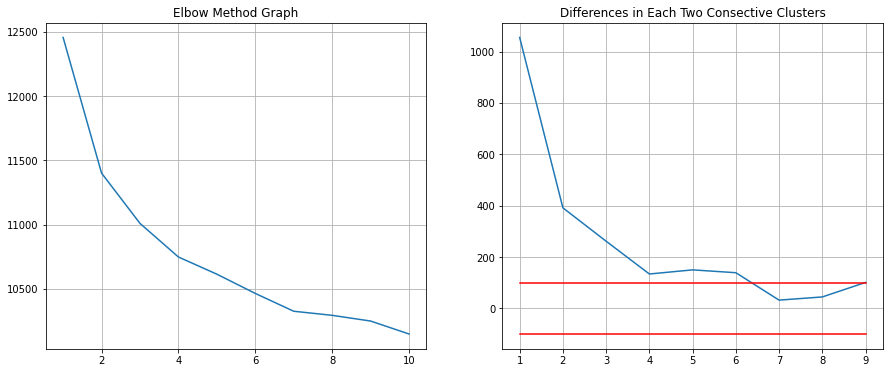

In [108]:
# Now, first we will run it for 1–10 number of cluster

elbow_method.run(1, 10)
elbow_method.showPlot(boundary = 100)

C:\Users\ram\AppData\Local\Temp\ipykernel_1940\2835958175.py:33: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b = True)


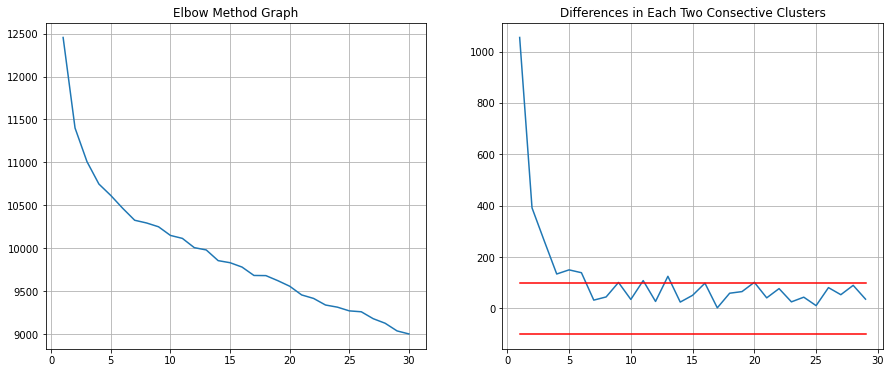

In [109]:
# Since, we don’t have any clear elbow yet and also we don’t have differences inside the boundary.
#  Now let run it for clusters 11–30

elbow_method.run(11, 30)
elbow_method.showPlot(boundary = 100)

#####  since after the point 20 the differences are inside the boundary so we take optimal k = 20

### Fitting Data on Model

In [110]:
# K-means model

kmeans = KMeans(n_clusters=20, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
clusters = kmeans.fit_predict(sparseMatrix)

In [111]:
#  creating a dataframe to see each user with its cluster

users_cluster = pd.DataFrame(np.concatenate((users.reshape(-1,1), clusters.reshape(-1,1)), axis = 1), columns = ['userId', 'Cluster'])
users_cluster.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
userId,1,2,3,4,5,7,8,9,10,11,...,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171
Cluster,1,4,1,4,1,7,7,4,6,7,...,4,2,0,4,6,4,4,4,0,4


In [112]:
# this function creates a list containing dataframes which stores count of movies present in each cluster.
#  [DataFrame(Cluster 0 Movies count), DataFrame(Cluster 1 Movies count), ... ,DataFrame(Cluster N Movies count)]
# users_data => users_fav_movies 


def clustersMovies(users_cluster, users_data):  
    clusters = list(users_cluster['Cluster'])
    each_cluster_movies = list()
    for i in range(len(np.unique(clusters))):
        users_list = list(users_cluster[users_cluster['Cluster'] == i]['userId'])
        users_movies_list = list()
        for user in users_list:    
            users_movies_list.extend(list(users_data[users_data['userId'] == user]['movieId']))
        users_movies_counts = list()
        users_movies_counts.extend([[movie, users_movies_list.count(movie)] for movie in np.unique(users_movies_list)])
        each_cluster_movies.append(pd.DataFrame(users_movies_counts, columns=['movieId', 'Count']).sort_values(by = ['Count'], ascending = False).reset_index(drop=True))
    return each_cluster_movies

    
cluster_movies = clustersMovies(users_cluster, users_fav_movies)

In [113]:
# DataFrame for cluster 1
cluster_movies[0].T

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,216
movieId,356,457,480,318,150,589,597,1,539,380,...,160,163,542,168,170,538,534,531,173,379
Count,24,24,22,19,18,18,18,17,17,17,...,1,1,1,1,1,1,1,1,1,1


In [114]:
# Displaying users we have in each cluster

for i in range(20):
    len_users = users_cluster[users_cluster['Cluster'] == i].shape[0]
    print('Users in Cluster ' + str(i) + ' -> ', len_users)

Users in Cluster 0 ->  27
Users in Cluster 1 ->  98
Users in Cluster 2 ->  46
Users in Cluster 3 ->  3
Users in Cluster 4 ->  370
Users in Cluster 5 ->  8
Users in Cluster 6 ->  86
Users in Cluster 7 ->  139
Users in Cluster 8 ->  27
Users in Cluster 9 ->  42
Users in Cluster 10 ->  1
Users in Cluster 11 ->  1
Users in Cluster 12 ->  97
Users in Cluster 13 ->  1
Users in Cluster 14 ->  1
Users in Cluster 15 ->  32
Users in Cluster 16 ->  1
Users in Cluster 17 ->  1
Users in Cluster 18 ->  18
Users in Cluster 19 ->  1


### Fixing small clusters

In [115]:
# function to get user favorite movies list

def getMoviesOfUser(user_id, users_data):
    return list(users_data[users_data['userId'] == user_id]['movieId'])

In [116]:
# function for fixing small clusters

# clusters_movies_dataframes: will be a list which will contain each dataframes of each cluster movies
# users_cluster_dataframe: will be a dataframe which contain users IDs and their cluster no.
# smallest_cluster_size: is a smallest cluster size which we want for a cluster to not remove

def fixClusters(clusters_movies_dataframes, users_cluster_dataframe, users_data, smallest_cluster_size = 10):
    each_cluster_movies = clusters_movies_dataframes.copy()
    users_cluster = users_cluster_dataframe.copy()
    # Let convert dataframe in each_cluster_movies to list with containing only movies IDs
    each_cluster_movies_list = [list(df['movieId']) for df in each_cluster_movies]
    # First we will prepair a list which containt lists of users in each cluster -> [[Cluster 0 Users], [Cluster 1 Users], ... ,[Cluster N Users]] 
    usersInClusters = list()
    total_clusters = len(each_cluster_movies)
    for i in range(total_clusters):
        usersInClusters.append(list(users_cluster[users_cluster['Cluster'] == i]['userId']))
    uncategorizedUsers = list()
    i = 0
    # Now we will remove small clusters and put their users into another list named "uncategorizedUsers"
    # Also when we will remove a cluster, then we have also bring back cluster numbers of users which comes after deleting cluster
    # E.g. if we have deleted cluster 4 then their will be users whose clusters will be 5,6,7,..,N. 
    # So, we'll bring back those users cluster number to 4,5,6,...,N-1.
    for j in range(total_clusters):
        if len(usersInClusters[i]) < smallest_cluster_size:
            uncategorizedUsers.extend(usersInClusters[i])
            usersInClusters.pop(i)
            each_cluster_movies.pop(i)
            each_cluster_movies_list.pop(i)
            users_cluster.loc[users_cluster['Cluster'] > i, 'Cluster'] -= 1
            i -= 1
        i += 1
    for user in uncategorizedUsers:
        elemProbability = list()
        user_movies = getMoviesOfUser(user, users_data)
        if len(user_movies) == 0:
            print(user)
        user_missed_movies = list()
        for movies_list in each_cluster_movies_list:
            count = 0
            missed_movies = list()
            for movie in user_movies:
                if movie in movies_list:
                    count += 1
                else:
                    missed_movies.append(movie)
            elemProbability.append(count / len(user_movies))
            user_missed_movies.append(missed_movies)
        user_new_cluster = np.array(elemProbability).argmax()
        users_cluster.loc[users_cluster['userId'] == user, 'Cluster'] = user_new_cluster
        if len(user_missed_movies[user_new_cluster]) > 0:
            each_cluster_movies[user_new_cluster] = each_cluster_movies[user_new_cluster].append([{'movieId': new_movie, 'Count': 1} for new_movie in user_missed_movies[user_new_cluster]], ignore_index = True)
    return each_cluster_movies, users_cluster

In [117]:
# running the above function

movies_df_fixed, clusters_fixed = fixClusters(cluster_movies, users_cluster, users_fav_movies, smallest_cluster_size = 10)

C:\Users\ram\AppData\Local\Temp\ipykernel_1940\3819180529.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  each_cluster_movies[user_new_cluster] = each_cluster_movies[user_new_cluster].append([{'movieId': new_movie, 'Count': 1} for new_movie in user_missed_movies[user_new_cluster]], ignore_index = True)
C:\Users\ram\AppData\Local\Temp\ipykernel_1940\3819180529.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  each_cluster_movies[user_new_cluster] = each_cluster_movies[user_new_cluster].append([{'movieId': new_movie, 'Count': 1} for new_movie in user_missed_movies[user_new_cluster]], ignore_index = True)
C:\Users\ram\AppData\Local\Temp\ipykernel_1940\3819180529.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  each

In [118]:
# printing those clusters which contain maximum 10 users

j = 0
for i in range(20):
    len_users = users_cluster[users_cluster['Cluster'] == i].shape[0]
    if len_users < 10:
        print('Users in Cluster ' + str(i) + ' -> ', len_users)
        j += 1
print('Total Cluster which we want to remove -> ', j)

Users in Cluster 3 ->  3
Users in Cluster 5 ->  8
Users in Cluster 10 ->  1
Users in Cluster 11 ->  1
Users in Cluster 13 ->  1
Users in Cluster 14 ->  1
Users in Cluster 16 ->  1
Users in Cluster 17 ->  1
Users in Cluster 19 ->  1
Total Cluster which we want to remove ->  9


In [119]:
# clusters before fixing 

print('No. of total clusters before fixing is -> ', len(cluster_movies))
print('Max value in users_cluster dataframe column Cluster is -> ', users_cluster['Cluster'].max())
print('And dataframe is following')
users_cluster.T

No. of total clusters before fixing is ->  20
Max value in users_cluster dataframe column Cluster is ->  19
And dataframe is following


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
userId,1,2,3,4,5,7,8,9,10,11,...,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171
Cluster,1,4,1,4,1,7,7,4,6,7,...,4,2,0,4,6,4,4,4,0,4


In [120]:
# clusters after fixing 

print('Length of total clusters after fixing is -> ', len(movies_df_fixed))
print('Max value in users_cluster dataframe column Cluster is -> ', clusters_fixed['Cluster'].max())
print('And fixed dataframe is following')
clusters_fixed.T

Length of total clusters after fixing is ->  11
Max value in users_cluster dataframe column Cluster is ->  10
And fixed dataframe is following


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
userId,1,2,3,4,5,7,8,9,10,11,...,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171
Cluster,1,3,1,3,1,5,5,3,4,5,...,3,2,0,3,4,3,3,3,0,3


In [121]:
print('Users cluster dataFrame for cluster 18 before fixing:')
users_cluster[users_cluster['Cluster'] == 4].T

Users cluster dataFrame for cluster 18 before fixing:


,1,3,7,11,14,16,17,18,23,25,...,983,987,988,989,990,993,995,996,997,999
userId,2,4,9,15,18,21,22,23,29,31,...,1154,1159,1160,1161,1162,1165,1167,1168,1169,1171
Cluster,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [122]:
print('Users cluster dataFrame for cluster 10 after fixing which should be same as 18th cluster before fixing:')
clusters_fixed[clusters_fixed['Cluster'] == 3].T

Users cluster dataFrame for cluster 10 after fixing which should be same as 18th cluster before fixing:


,1,3,7,11,14,16,17,18,23,25,...,983,987,988,989,990,993,995,996,997,999
userId,2,4,9,15,18,21,22,23,29,31,...,1154,1159,1160,1161,1162,1165,1167,1168,1169,1171
Cluster,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [123]:
print('Size of movies dataframe after fixing -> ', len(movies_df_fixed)) 

Size of movies dataframe after fixing ->  11


In [124]:
# sizes of each cluster

for i in range(len(movies_df_fixed)):
    len_users = clusters_fixed[clusters_fixed['Cluster'] == i].shape[0]
    print('Users in Cluster ' + str(i) + ' -> ', len_users)

Users in Cluster 0 ->  29
Users in Cluster 1 ->  100
Users in Cluster 2 ->  46
Users in Cluster 3 ->  374
Users in Cluster 4 ->  90
Users in Cluster 5 ->  139
Users in Cluster 6 ->  29
Users in Cluster 7 ->  42
Users in Cluster 8 ->  97
Users in Cluster 9 ->  36
Users in Cluster 10 ->  18


In [125]:
# total number of movies in each cluster

for i in range(len(movies_df_fixed)):
    print('Total movies in Cluster ' + str(i) + ' -> ', movies_df_fixed[i].shape[0])

Total movies in Cluster 0 ->  226
Total movies in Cluster 1 ->  219
Total movies in Cluster 2 ->  113
Total movies in Cluster 3 ->  426
Total movies in Cluster 4 ->  342
Total movies in Cluster 5 ->  206
Total movies in Cluster 6 ->  350
Total movies in Cluster 7 ->  287
Total movies in Cluster 8 ->  295
Total movies in Cluster 9 ->  323
Total movies in Cluster 10 ->  261


##### We are done with training machine learning model using k-means and making predictions of clusters for each user. Now, we will use pickle to save and load our training data.

In [126]:
# class to save DataFrames which we created above and load data which we saved

class saveLoadFiles:
    def save(self, filename, data):
        try:
            file = open('./Saved_DataFrames/' + filename + '.pkl', 'wb')
            pickle.dump(data, file)
        except:
            err = 'Error: {0}, {1}'.format(exc_info()[0], exc_info()[1])
            print(err)
            file.close()
            return [False, err]
        else:
            file.close()
            return [True]
    def load(self, filename):
        try:
            file = open('./Saved_DataFrames/' + filename + '.pkl', 'rb')
        except:
            err = 'Error: {0}, {1}'.format(exc_info()[0], exc_info()[1])
            print(err)
            file.close()
            return [False, err]
        else:
            data = pickle.load(file)
            file.close()
            return data
    def loadClusterMoviesDataset(self):
        return self.load('clusters_movies_dataset')
    def saveClusterMoviesDataset(self, data):
        return self.save('clusters_movies_dataset', data)
    def loadUsersClusters(self):
        return self.load('users_clusters')
    def saveUsersClusters(self, data):
        return self.save('users_clusters', data)

In [127]:
# saving the dataframes we created above

saveLoadFile = saveLoadFiles()
print(saveLoadFile.saveClusterMoviesDataset(movies_df_fixed))
print(saveLoadFile.saveUsersClusters(clusters_fixed))

[True]
[True]


In [128]:
# loading the data

load_movies_list, load_users_clusters = saveLoadFile.loadClusterMoviesDataset(), saveLoadFile.loadUsersClusters()
print('Type of Loading list of Movies dataframes of 11 Clusters: ', type(load_movies_list), ' and Length is: ', len(load_movies_list))
print('Type of Loading 100 Users clusters Data: ', type(load_users_clusters), ' and Shape is: ', load_users_clusters.shape)

Type of Loading list of Movies dataframes of 11 Clusters:  <class 'list'>  and Length is:  11
Type of Loading 100 Users clusters Data:  <class 'pandas.core.frame.DataFrame'>  and Shape is:  (1000, 2)


### Recommendations for Users

In [129]:
class userRequestedFor:
    def __init__(self, user_id, users_data):
        self.users_data = users_data.copy()
        self.user_id = user_id
        # Finding cluster no. to which the user belongs
        users_cluster = saveLoadFiles().loadUsersClusters()
        self.user_cluster = int(users_cluster[users_cluster['userId'] == self.user_id]['Cluster'])
        # Load User Cluster Movies Dataframe
        self.movies_list = saveLoadFiles().loadClusterMoviesDataset()
        self.cluster_movies = self.movies_list[self.user_cluster] # dataframe of that cluster to which the user belongs
        self.cluster_movies_list = list(self.cluster_movies['movieId']) # list of movie ids present in that cluster
    def updatedFavouriteMoviesList(self, new_movie_Id):
        if new_movie_Id in self.cluster_movies_list:
            self.cluster_movies.loc[self.cluster_movies['movieId'] == new_movie_Id, 'Count'] += 1
        else:
            self.cluster_movies = self.cluster_movies.append([{'movieId':new_movie_Id, 'Count': 1}], ignore_index=True)
        self.cluster_movies.sort_values(by = ['Count'], ascending = False, inplace= True)
        self.movies_list[self.user_cluster] = self.cluster_movies
        saveLoadFiles().saveClusterMoviesDataset(self.movies_list)

    def recommendMostFavouriteMovies(self):
        try:
            user_movies = getMoviesOfUser(self.user_id, self.users_data)
            cluster_movies_list = self.cluster_movies_list.copy()
            for user_movie in user_movies:
                if user_movie in cluster_movies_list:
                    cluster_movies_list.remove(user_movie)
            return [True, cluster_movies_list]
        except KeyError:
            err = "User history does not exist"
            print(err)
            return [False, err]
        except:
            err = 'Error: {0}, {1}'.format(exc_info()[0], exc_info()[1])
            print(err)
            return [False, err]

In [130]:
# importing data for movies IDs and details like title, genre

movies_metadata = pd.read_csv(
    './Datasets/movies_metadata.csv', 
    usecols = ['id', 'genres', 'original_title'])

movies_metadata = movies_metadata.loc[
    movies_metadata['id'].isin(list(map(str, np.unique(users_fav_movies['movieId']))))].reset_index(drop=True)

movies_metadata

,genres,id,original_title
0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,Heat
1,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",524,Casino
2,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",5,Four Rooms
3,"[{'id': 14, 'name': 'Fantasy'}, {'id': 878, 'n...",902,La Cité des Enfants Perdus
4,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",63,Twelve Monkeys
...,...,...,...
513,"[{'id': 18, 'name': 'Drama'}]",206,Paradise Found
514,"[{'id': 18, 'name': 'Drama'}]",798,Pünktchen und Anton
515,"[{'id': 10751, 'name': 'Family'}]",799,Pünktchen und Anton
516,"[{'id': 16, 'name': 'Animation'}, {'id': 878, ...",30,彼女の想いで


In [131]:
# list of movies which were liked by user with ID 12

user12Movies = getMoviesOfUser(12, users_fav_movies)
for movie in user12Movies:
    title = list(movies_metadata.loc[movies_metadata['id'] == str(movie)]['original_title'])
    if title != []:
        print('Movie title: ', title, ', Genres: [', end = '')
        genres = ast.literal_eval(movies_metadata.loc[movies_metadata['id'] == str(movie)]['genres'].values[0].split('[')[1].split(']')[0])
        for genre in genres:
                print(genre, ', ', end = '')
        print(end = '\b\b]')
        print('')

Movie title:  ['Dancer in the Dark'] , Genres: [{'id': 18, 'name': 'Drama'} , {'id': 80, 'name': 'Crime'} , {'id': 10402, 'name': 'Music'} ]
Movie title:  ['The Dark'] , Genres: [{'id': 27, 'name': 'Horror'} , {'id': 53, 'name': 'Thriller'} , {'id': 9648, 'name': 'Mystery'} ]
Movie title:  ['Miami Vice'] , Genres: [{'id': 28, 'name': 'Action'} , {'id': 12, 'name': 'Adventure'} , {'id': 80, 'name': 'Crime'} , {'id': 53, 'name': 'Thriller'} ]
Movie title:  ['Tron'] , Genres: [{'id': 878, 'name': 'Science Fiction'} , {'id': 28, 'name': 'Action'} , {'id': 12, 'name': 'Adventure'} ]
Movie title:  ['The Lord of the Rings'] , Genres: [{'id': 14, 'name': 'Fantasy'} , {'id': 18, 'name': 'Drama'} , {'id': 16, 'name': 'Animation'} , {'id': 12, 'name': 'Adventure'} ]
Movie title:  ['48 Hrs.'] , Genres: [{'id': 53, 'name': 'Thriller'} , {'id': 28, 'name': 'Action'} , {'id': 35, 'name': 'Comedy'} , {'id': 80, 'name': 'Crime'} , {'id': 18, 'name': 'Drama'} ]
Movie title:  ['Edward Scissorhands'] , Ge

In [132]:
# top 10 recommended movies for user with ID 12

user12Recommendations = userRequestedFor(12, users_fav_movies).recommendMostFavouriteMovies()[1]
for movie in user12Recommendations[:12]:
    title = list(movies_metadata.loc[movies_metadata['id'] == str(movie)]['original_title'])
    if title != []:
        print('Movie title: ', title, ', Genres: [', end = '')
        genres = ast.literal_eval(movies_metadata.loc[movies_metadata['id'] == str(movie)]['genres'].values[0].split('[')[1].split(']')[0])
        for genre in genres:
            print(genre, ', ', end = '')
        print(']', end = '')
        print()

Movie title:  ['Dawn of the Dead'] , Genres: [id , name , ]
Movie title:  ['Blood: The Last Vampire'] , Genres: [{'id': 14, 'name': 'Fantasy'} , {'id': 16, 'name': 'Animation'} , {'id': 27, 'name': 'Horror'} , {'id': 35, 'name': 'Comedy'} , {'id': 53, 'name': 'Thriller'} , {'id': 878, 'name': 'Science Fiction'} , ]
Movie title:  ['The Big Sleep'] , Genres: [{'id': 80, 'name': 'Crime'} , {'id': 18, 'name': 'Drama'} , {'id': 9648, 'name': 'Mystery'} , {'id': 53, 'name': 'Thriller'} , ]
Movie title:  ['Scarface'] , Genres: [{'id': 28, 'name': 'Action'} , {'id': 80, 'name': 'Crime'} , {'id': 18, 'name': 'Drama'} , {'id': 53, 'name': 'Thriller'} , ]
Movie title:  ['Dawn of the Dead'] , Genres: [{'id': 14, 'name': 'Fantasy'} , {'id': 27, 'name': 'Horror'} , {'id': 28, 'name': 'Action'} , ]
Movie title:  ['Meet Me in St. Louis'] , Genres: [{'id': 35, 'name': 'Comedy'} , {'id': 10402, 'name': 'Music'} , {'id': 10749, 'name': 'Romance'} , ]
Movie title:  ['Birdman of Alcatraz'] , Genres: [id , 

In [133]:
array_of_clusters = clusters_fixed["Cluster"]
array_of_clusters = np.array(array_of_clusters)

In [134]:
array_of_clusters

array([ 1,  3,  1,  3,  1,  5,  5,  3,  4,  5,  6,  3,  8,  1,  3,  4,  3,
        3,  3,  9,  4,  8,  5,  3,  8,  3,  3, 10,  7,  3,  3,  5,  2,  1,
        1,  4, 10,  6,  5,  4,  5,  8,  2,  8,  3,  1,  4,  3,  9,  3,  3,
        3,  7,  8,  3,  7,  3,  4,  7,  3,  3,  3,  3,  3,  0,  8,  5,  3,
        3,  9,  3,  3,  3,  1,  3,  2,  4,  8, 10,  5,  8,  5,  3,  5,  8,
        2,  2,  9,  3,  8,  3,  3,  5,  1,  5,  8,  3,  1,  4,  8,  3,  2,
        4,  6,  3,  3,  8,  3,  7, 10,  4,  5,  8,  8,  6,  8,  3,  3,  5,
        3,  5,  3,  5,  1,  3,  5,  8,  5,  4,  5,  3,  3,  0,  3,  7,  1,
        8,  3,  1,  5,  3,  3,  3,  5,  3,  3,  3,  3,  1,  5,  2,  3,  3,
        3,  1,  3,  1,  1,  4,  3,  1,  0,  0,  4,  3,  3,  2,  3,  1,  3,
        9,  3,  3,  3,  1,  4,  3,  1,  3,  3,  5,  3,  5,  5,  4,  3,  3,
        3,  3,  4,  0,  4,  3,  7,  8,  7,  8,  7,  8,  3,  5,  3,  1,  3,
        3,  3,  3,  5,  2,  5,  0,  8,  3,  3,  5,  8,  5,  3,  5,  0,  5,
        3,  3,  3,  7,  8

In [135]:
from sklearn.metrics import silhouette_samples, silhouette_score
cluster_labels = np.array(clusters_fixed["Cluster"])
#cluster_labels = np.array(users_cluster["Cluster"])
silhouette_avg = silhouette_score(sparseMatrix, cluster_labels)                                                                                                                                                             *11.30190      

print(silhouette_avg)

-0.03358836036304772
